In [5]:
# Descriptive analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load data
data = pd.read_csv("atlas-higgs-challenge-2014-v2.csv")

# summary
print(data.describe())

             EventId   DER_mass_MMC  DER_mass_transverse_met_lep  \
count  818238.000000  818238.000000                818238.000000   
mean   509118.500000     -48.819019                    49.252714   
std    236205.109118     406.118397                    35.378609   
min    100000.000000    -999.000000                     0.000000   
25%    304559.250000      78.166000                    19.304000   
50%    509118.500000     105.061000                    46.484000   
75%    713677.750000     130.730000                    73.620000   
max    918237.000000    1949.261000                   968.669000   

        DER_mass_vis       DER_pt_h  DER_deltaeta_jet_jet  DER_mass_jet_jet  \
count  818238.000000  818238.000000         818238.000000     818238.000000   
mean       81.140561      57.849524           -707.740880       -600.191191   
std        40.582708      63.411938            454.793899        658.724040   
min         6.329000       0.000000           -999.000000       -999.00

### Columns

In [4]:
print(data.columns)

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label', 'KaggleSet', 'KaggleWeight'],
      dtype='object')


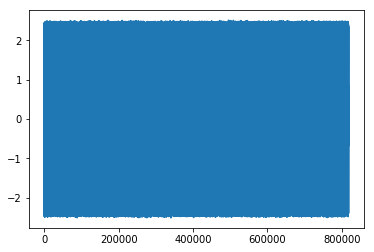

In [11]:
plt.plot(data.index, data.PRI_lep_eta)

# Plot plt.hist

plt.show()

In [12]:
print(data.head())

   EventId  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0   100000       138.470                       51.655        97.827    27.980   
1   100001       160.937                       68.768       103.235    48.146   
2   100002      -999.000                      162.172       125.953    35.635   
3   100003       143.905                       81.417        80.943     0.414   
4   100004       175.864                       16.915       134.805    16.405   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0                  0.91           124.711                2.666   
1               -999.00          -999.000             -999.000   
2               -999.00          -999.000             -999.000   
3               -999.00          -999.000             -999.000   
4               -999.00          -999.000             -999.000   

   DER_deltar_tau_lep  DER_pt_tot      ...       PRI_jet_leading_eta  \
0               3.064      41.928      ...  

In [14]:
# check if there are any NaN's in the data set
print(data.isnull().values.any())

False
